In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import librosa
import numpy as np

from IPython.display import Audio
import os

In [3]:
def load_audio(path, verbose=False):
    audio, sr = librosa.load(path, sr=16_000)

    return audio, sr

def make_plot(audio_array, sample_rate):
    plt.figure().set_figwidth(14)
    librosa.display.waveshow(audio_array, sr=sample_rate)

    ## Espectograma
    D = librosa.stft(audio_array)
    # Convert the complex-valued result to magnitude
    S_db = librosa.amplitude_to_db(abs(D), ref=np.max)
    # Display the spectrogram
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
    # plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()

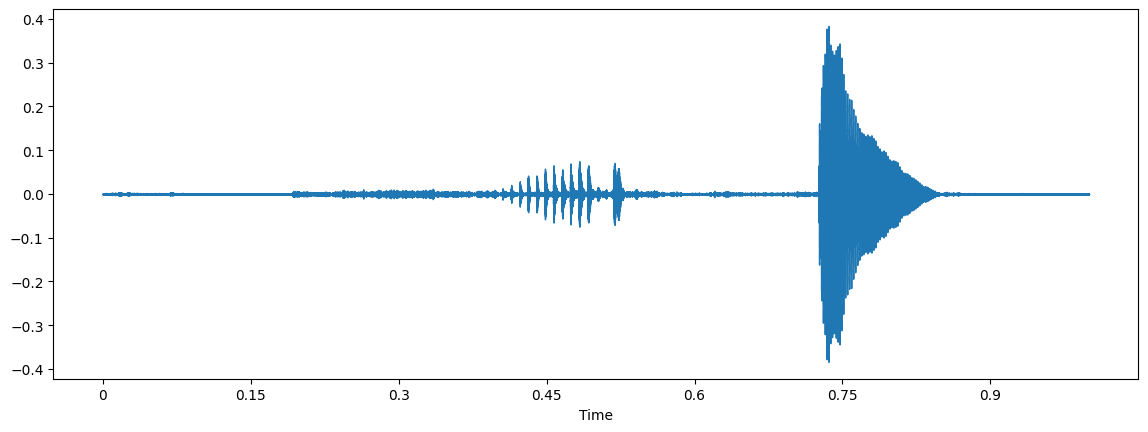

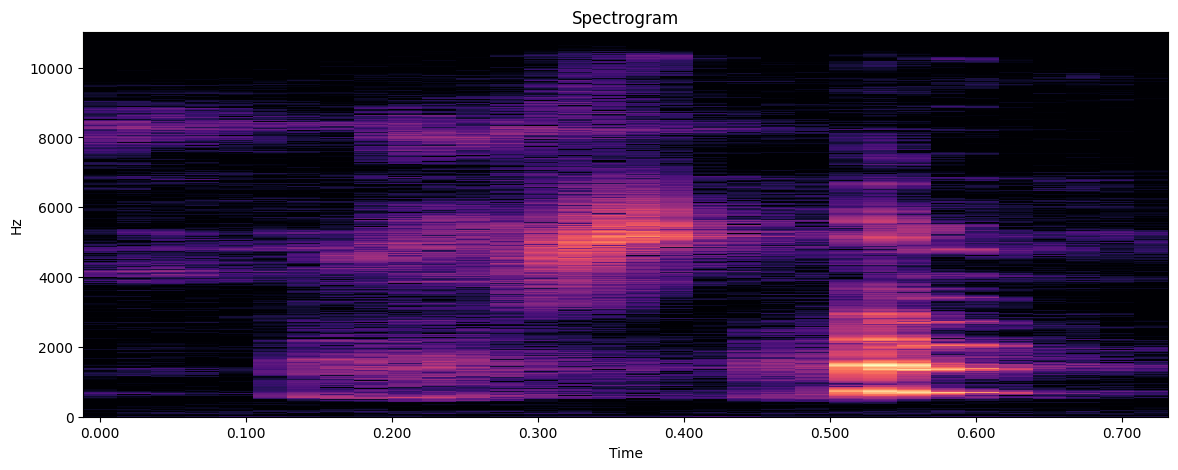

In [20]:
ROOT_PATH = '../data/embedding/BOAFAB_REAL/'
list_of_audios = os.listdir(ROOT_PATH)
audio, sr = load_audio(ROOT_PATH + list_of_audios[999])

make_plot(audio, sr)
Audio(data=audio, rate=sr)

In [21]:
import os
import sys
sys.path.append(os.path.abspath("../classificador"))
sys.path.append(os.path.abspath("../generative"))
from torch.utils.data import DataLoader


In [22]:
from torchvision.transforms import *
from transforms import transforms_wav as twav
from dataset_manager import *

ROOT_PATH = '../data/embedding/'

data_aug_transform = Compose([
    twav.ChangeAmplitude(), 
    twav.ChangeSpeedAndPitchAudio(), 
    twav.FixAudioLength()])

train_dataset = GenerativeAIDataset(ROOT_PATH,
                                transform=Compose([twav.LoadAudio(),
                                         data_aug_transform
                                ]), class_c='BOAFAB_REAL')

train_dataloader = DataLoader(train_dataset, batch_size=1000, drop_last=True)
sample_aug = next(iter(train_dataloader))

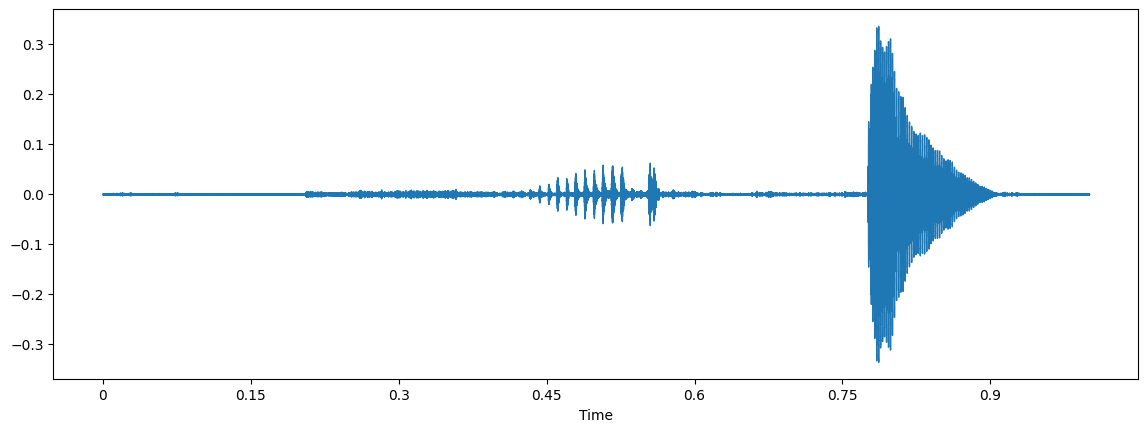

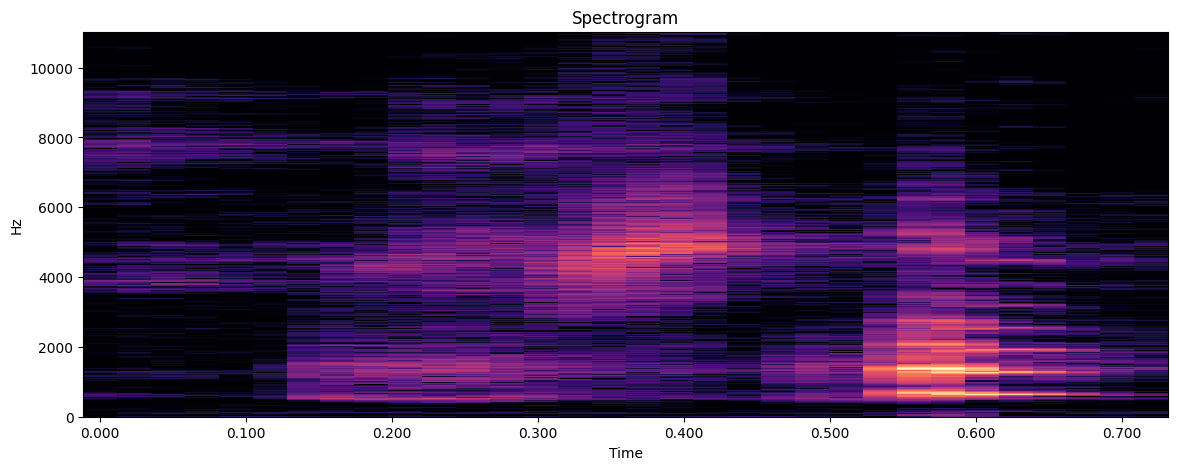

In [23]:
audio_ag, sr = sample_aug['samples'][999].numpy(), sample_aug['sample_rate'][0].item()

make_plot(audio_ag, sr)
Audio(data=audio_ag, rate=sr)

In [36]:
import soundfile as sf
def save_audios(dict_audios, real_fake, sr):
    for key in dict_audios:
        audio = dict_audios[key]
        
        new_path = f'{key}.wav'
        sf.write(f'../data/embedding/BOAFAB_{real_fake}/{new_path}', audio, sr)

In [38]:
dict_to_save = {
    i: audio.numpy() for i, audio in enumerate(sample_aug['samples'])
}
save_audios(dict_to_save, 'DATA_AUG', 16_000)

In [34]:
# dict_to_save

In [29]:
for i in sample_aug:
    print(i)
    break

path


In [27]:
sample_aug['samples'].shape

torch.Size([1000, 16000])

In [24]:
audio

array([ 1.4648438e-03,  1.8310547e-04, -5.1879883e-04, ...,
        9.1552734e-05, -6.4086914e-04, -3.0517578e-05], dtype=float32)